<a href="https://colab.research.google.com/github/ShanthiniJoshitha/Spaceship-Titanic/blob/main/Spaceship_Titanic_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive (if using Colab)
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Separate features and target variable
X = data.drop(columns=['Transported'])
y = data['Transported']

# Reduce cardinality for high-cardinality features
threshold = 10  # Define a threshold for frequency
name_counts = X['Name'].value_counts()
names_to_replace = name_counts[name_counts < threshold].index
X['Name'] = X['Name'].replace(names_to_replace, 'Other')

# Frequency encoding for high cardinality columns (e.g., PassengerId and Cabin)
X['PassengerId'] = X['PassengerId'].map(X['PassengerId'].value_counts())
X['Cabin'] = X['Cabin'].map(X['Cabin'].value_counts())

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create transformers for each type of feature
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values for numerical features
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical features
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Create DataFrame from processed features
encoded_column_names = (
    list(numerical_features) +
    list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
)
X_processed_df = pd.DataFrame(X_processed, columns=encoded_column_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print("Preprocessing completed.")
print(f"Processed DataFrame contains {X_processed_df.shape[1]} columns.")  # Print only the number of columns
print("Sample of processed DataFrame columns:", X_processed_df.columns[:10])  # Print a sample of the column names




Preprocessing completed.
Processed DataFrame contains 19 columns.
Sample of processed DataFrame columns: Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa'],
      dtype='object')


In [ ]:
# Before PCA: Print shapes of training and test sets
print(f"Original training data shape: {X_train.shape}")
print(f"Original test data shape: {X_test.shape}")

# Perform PCA to reduce dimensions
pca = PCA(n_components=10)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create DataFrame for PCA components
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Print shapes after PCA
print(f"PCA completed. Reduced training data shape: {X_train_pca_df.shape}")
print(f"Reduced test data shape: {X_test_pca_df.shape}")

# Print the PCA component column names
print("PCA component column names:")
print(X_train_pca_df.columns.tolist())


Original training data shape: (6954, 19)
Original test data shape: (1739, 19)
PCA completed. Reduced training data shape: (6954, 10)
Reduced test data shape: (1739, 10)
PCA component column names:
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


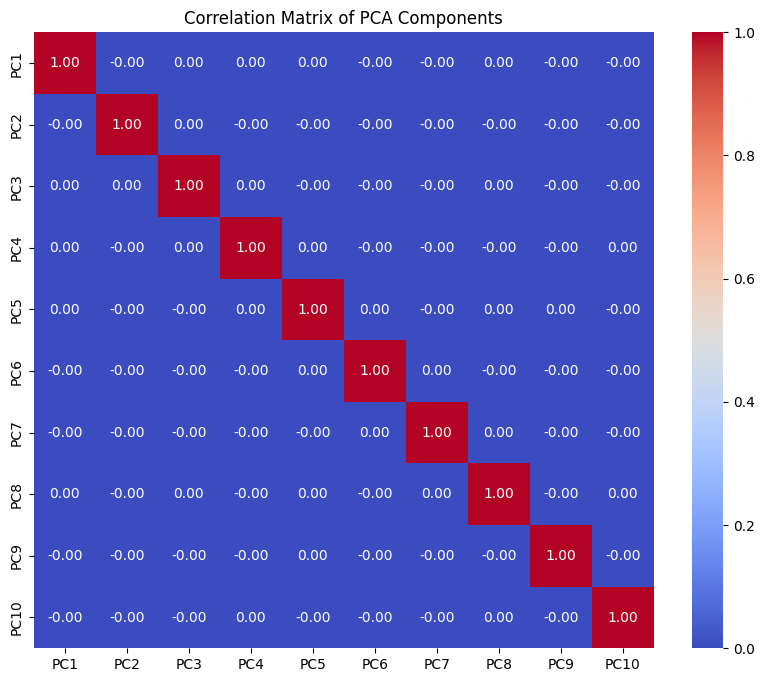

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Calculate the correlation matrix
correlation_matrix = pca_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of PCA Components')
plt.show()


In [ ]:
pip install pgmpy

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233

In [ ]:
# Import necessary libraries for Bayesian network modeling
import pandas as pd
from pgmpy.models import BayesianNetwork  # Updated import
from pgmpy.estimators import BayesianEstimator

# Define the Bayesian model
bayesian_model = BayesianNetwork()  # Use BayesianNetwork instead

# Define edges using PCA components and the target variable 'Transported'
edges = [
    ('PC1', 'Transported'),
    ('PC2', 'Transported'),
    ('PC3', 'Transported'),
    ('PC4', 'Transported'),
    ('PC5', 'Transported'),
    ('PC6', 'Transported'),

    # Optionally, you can connect PCA components to each other if needed
    # ('PC1', 'PC2'),  # Example of a connection between components
]

# Add edges to the Bayesian model
bayesian_model.add_edges_from(edges)

# Ensure 'Transported' is part of your training data
# Assuming 'y_train' is the target variable extracted from your dataset
# y_train = ...  # Extract your target variable

# Combine PCA features and target variable into a single DataFrame
X_train_combined = pd.concat([X_train_pca_df, y_train.reset_index(drop=True)], axis=1)

# Check the shape of the combined DataFrame
print(f"Shape of combined DataFrame: {X_train_combined.shape}")

# Fit the Bayesian model using the PCA-transformed data
try:
    bayesian_model.fit(X_train_combined, estimator=BayesianEstimator, prior_type='BDeu')
except KeyError as e:
    print(f"KeyError: {e} - This feature is missing in your DataFrame.")
except ValueError as e:
    print(f"ValueError: {e} - There might be a problem with the size of your DataFrame.")


Shape of combined DataFrame: (6954, 11)


MemoryError: Unable to allocate 2.80 EiB for an array with shape (2, 202090694634321472) and data type float64

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA

# Before PCA: Print shapes of training and test sets
print(f"Original training data shape: {X_train.shape}")
print(f"Original test data shape: {X_test.shape}")

# Use IncrementalPCA for large datasets
pca = IncrementalPCA(n_components=10)  # Reduce to 10 components for now, adjust as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create DataFrame for PCA components
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Print shapes after PCA
print(f"PCA completed. Reduced training data shape: {X_train_pca_df.shape}")
print(f"Reduced test data shape: {X_test_pca_df.shape}")

# Print the PCA component column names
print("PCA component column names:")
print(X_train_pca_df.columns.tolist())

# Import necessary libraries for Bayesian network modeling
import pandas as pd
from pgmpy.models import BayesianNetwork  # Updated import
from pgmpy.estimators import BayesianEstimator

# Define the Bayesian model
bayesian_model = BayesianNetwork()  # Use BayesianNetwork instead

# Define edges using PCA components and the target variable 'Transported'
edges = [
    ('PC1', 'Transported'),
    ('PC2', 'Transported'),
    ('PC3', 'Transported'),
    ('PC4', 'Transported'),
    ('PC5', 'Transported'),
    ('PC6', 'Transported'),
]

# Add edges to the Bayesian model
bayesian_model.add_edges_from(edges)

# Ensure 'Transported' is part of your training data
# Assuming 'y_train' is the target variable extracted from your dataset
# y_train = ...  # Extract your target variable

# Combine PCA features and target variable into a single DataFrame
X_train_combined = pd.concat([X_train_pca_df, y_train.reset_index(drop=True)], axis=1)

# Check the shape of the combined DataFrame
print(f"Shape of combined DataFrame: {X_train_combined.shape}")

# Fit the Bayesian model using the PCA-transformed data
try:
    bayesian_model.fit(X_train_combined, estimator=BayesianEstimator, prior_type='BDeu')
except KeyError as e:
    print(f"KeyError: {e} - This feature is missing in your DataFrame.")
except ValueError as e:
    print(f"ValueError: {e} - There might be a problem with the size of your DataFrame.")


Original training data shape: (6954, 19)
Original test data shape: (1739, 19)
PCA completed. Reduced training data shape: (6954, 10)
Reduced test data shape: (1739, 10)
PCA component column names:
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Shape of combined DataFrame: (6954, 11)


MemoryError: Unable to allocate 2.80 EiB for an array with shape (2, 202090694634321472) and data type float64

In [ ]:
X_train_pca_df.shape

(6954, 10)

**code currently working somewhat**

In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import KBinsDiscretizer  # Import for discretization
from sklearn.metrics import accuracy_score  # Import for accuracy calculation

# ... (Your existing code for PCA and data preparation) ...
X_train_combined = pd.concat([X_train_pca_df, y_train.reset_index(drop=True)], axis=1)

# Discretize PCA components and target variable if necessary
n_bins = 5  # Adjust the number of bins as needed
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Discretize PCA components in the training set
X_train_discretized = discretizer.fit_transform(X_train_pca_df)
X_test_discretized = discretizer.transform(X_test_pca_df)

# Convert to DataFrame
X_train_discretized_df = pd.DataFrame(X_train_discretized, columns=[f'Discretized_PC{i+1}' for i in range(X_train_discretized.shape[1])])
X_test_discretized_df = pd.DataFrame(X_test_discretized, columns=[f'Discretized_PC{i+1}' for i in range(X_test_discretized.shape[1])])

# Combine discretized features with target variable
X_train_final = pd.concat([X_train_discretized_df, y_train.reset_index(drop=True)], axis=1)

# Define Bayesian Network structure
model = BayesianNetwork([('Discretized_PC1', 'Transported'),
                          ('Discretized_PC2', 'Transported'),
                          ('Discretized_PC3', 'Transported'),
                         ('Discretized_PC4', 'Transported'),
                         ('Discretized_PC5', 'Transported'),
                         ('Discretized_PC6', 'Transported'),
                         ('Discretized_PC7', 'Transported'),
                         ('Discretized_PC8', 'Transported'),
                         ('Discretized_PC9', 'Transported'),
                         ('Discretized_PC10', 'Transported')])

# Fit the model using Maximum Likelihood Estimation
model.fit(X_train_final, estimator=BayesianEstimator)

# Inference
inference = VariableElimination(model)

# Make predictions
y_pred = []
for index, row in X_test_discretized_df.iterrows():
    # Create a dictionary for the observation
    observation = {f'Discretized_PC{i+1}': row[f'Discretized_PC{i+1}'] for i in range(X_test_discretized_df.shape[1])}
    # Query the model for the probability of being transported
    prob_transport = inference.query(variables=['Transported'], evidence=observation)
    # Use a threshold to decide the predicted class (0.5 in this case)
    y_pred.append(1 if prob_transport.values[1] > 0.5 else 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Bayesian model: {accuracy * 100:.2f}%')


Accuracy of the Bayesian model: 74.07%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy of the Bayesian model: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy of the Bayesian model: 74.07%
              precision    recall  f1-score   support

       False       0.72      0.78      0.75       861
        True       0.77      0.70      0.73       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [ ]:
from pgmpy.inference import VariableElimination  # Or BeliefPropagation if you switched
from sklearn.metrics import accuracy_score
import pandas as pd  # Import pandas if not already imported

# ... (rest of your code) ...

# Make predictions on the test data
all_predictions = []

for i in range(X_test_pca_df.shape[0]):
    evidence = {f'PC{j+1}': int(X_test_pca_df.iloc[i, j])  # Cast to int here
                for j in range(X_test_pca_df.shape[1])
                if f'PC{j+1}' in bayesian_model.nodes()}

    prediction = inference.map_query(variables=['Transported'], evidence=evidence)
    all_predictions.append(prediction['Transported'])

# ... (rest of your code) ...

NameError: name 'inference' is not defined

In [ ]:
# prompt: from pgmpy.inference import VariableElimination  # Or BeliefPropagation if you switched
# from sklearn.metrics import accuracy_score
# import pandas as pd  # Import pandas if not already imported
# # ... (rest of your code) ...
# # Make predictions on the test data
# all_predictions = []
# for i in range(X_test_pca_df.shape[0]):
#     evidence = {f'PC{j+1}': int(X_test_pca_df.iloc[i, j])  # Cast to int here
#                 for j in range(X_test_pca_df.shape[1])
#                 if f'PC{j+1}' in bayesian_model.nodes()}
#     prediction = inference.map_query(variables=['Transported'], evidence=evidence)

# ... (Your existing code for PCA, Bayesian model fitting, etc.) ...

inference = VariableElimination(bayesian_model)

# Make predictions on the test data
all_predictions = []
for i in range(X_test_pca_df.shape[0]):
    evidence = {f'PC{j+1}': int(X_test_pca_df.iloc[i, j])  # Cast to int here
                for j in range(X_test_pca_df.shape[1])
                if f'PC{j+1}' in bayesian_model.nodes()}
    try:
        prediction = inference.map_query(variables=['Transported'], evidence=evidence)
        all_predictions.append(prediction['Transported'])
    except Exception as e:
        print(f"Error during prediction for row {i}: {e}")
        all_predictions.append(None)  # Handle prediction errors gracefully

# Convert predictions to a NumPy array
all_predictions = np.array(all_predictions)

# Remove rows with None predictions
y_test_filtered = y_test[all_predictions != None]  # Filter out corresponding y_test values
all_predictions_filtered = all_predictions[all_predictions != None]

# Calculate accuracy
accuracy = accuracy_score(y_test_filtered, all_predictions_filtered)
print(f"Accuracy of the Bayesian model: {accuracy}")